# Base íris, classificação multiclasse

Agora, iremos classificar tipos de flores em três categorias

- Iris setosa
- Iris versicolor
- Iris virgínica

# Primeiro passo

Extrair os dados do CSV, neste caso o csv possui tanto os dados previsores quanto os dados de teste. Por isso, iremos separar estes dados do CSV.

In [1]:
import pandas as pd

base       = pd.read_csv("iris.csv")
previsores = base.iloc[:,0:4].values
classe     = base.iloc[:,4].values

Além disso, precisamos transformar os dados da classe, em dados númericos que possam ser utilizados para treino

In [2]:
from sklearn.preprocessing import LabelEncoder 
from keras.utils import np_utils

# Transformar os dados em String para tipo numérico
label_enconder = LabelEncoder()
classe = label_enconder.fit_transform(classe)

# Transformar o array de uma dimensão em três dimensões, para se ajustar 
# com o modelo de saida que tem três possibilidades
classe_dummy = np_utils.to_categorical(classe)

2022-08-23 23:35:27.655220: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-23 23:35:27.655236: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Segundo passo

Separar os dados entre treino e teste

In [3]:
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, classe_dummy, test_size=0.25)

# Terceiro passo

Criar a nossa rede neural

In [4]:
from keras.models import Sequential
from keras.layers import Dense 

classificador = Sequential()

camada_escondida = Dense(units = 4,
                         activation = 'relu',
                         input_dim = 4)

camada_escondida2 = Dense(units = 4,
                          activation = 'relu')

"""
Diferente da classificação binária, neste caso temos 
três neurônios na camada de saída, pois temos três possíveis
resultados. Além disso, a nossa função de ativação será a softmax, pois
queremos transformar um vetor de dados (neste caso as informações processadas
das petalas), em um valor número probabilístico.
"""
camada_de_saida = Dense(units = 3, 
                        activation = 'softmax')

classificador.add(camada_escondida)
classificador.add(camada_escondida2)
classificador.add(camada_de_saida)

2022-08-23 23:35:32.554389: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 23:35:32.554600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-23 23:35:32.554652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-23 23:35:32.554685: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-23 23:35:32.554714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

# Quarto passo

Por fim, iremos compilar e treinar a rede neural

In [5]:
classificador.compile(
    optimizer="adam", 
    loss="categorical_crossentropy", 
    metrics=["categorical_accuracy"])

In [6]:
classificador.fit(x_treino, 
    y_treino, 
    batch_size=10, 
    epochs=1000)

Epoch 1/1000
12/12 [==============================] - 0s 590us/step - loss: 7.3631 - categorical_accuracy: 0.3393
Epoch 2/1000
12/12 [==============================] - 0s 519us/step - loss: 6.7424 - categorical_accuracy: 0.3393
Epoch 3/1000
12/12 [==============================] - 0s 517us/step - loss: 6.1690 - categorical_accuracy: 0.3393
Epoch 4/1000
12/12 [==============================] - 0s 524us/step - loss: 5.6476 - categorical_accuracy: 0.3393
Epoch 5/1000
12/12 [==============================] - 0s 541us/step - loss: 5.1591 - categorical_accuracy: 0.3393
Epoch 6/1000
12/12 [==============================] - 0s 521us/step - loss: 4.7167 - categorical_accuracy: 0.3393
Epoch 7/1000
12/12 [==============================] - 0s 501us/step - loss: 4.2836 - categorical_accuracy: 0.3393
Epoch 8/1000
12/12 [==============================] - 0s 510us/step - loss: 3.8809 - categorical_accuracy: 0.3393
Epoch 9/1000
12/12 [==============================] - 0s 533us/step - loss: 3.5365 - cat

# Quinto passo

Com os testes feitos, podemos agora avaliar o classificador e tentar fazer uma previsão

2/2 [==============================] - 0s 1ms/step


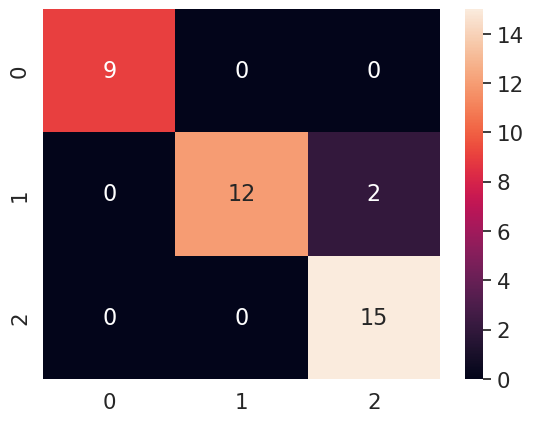

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

resultado = classificador.evaluate(x_teste, y_teste)
previsoes = classificador.predict(x_teste)

previsoes = (previsoes > 0.5)

# Aqui nos teremos que transformar o array tridimensional de volta para 
# unidimensional, colocando como valor os indices em cada linha com maior
# valor
y_teste2 = [np.argmax(t) for t in y_teste]
previsoes2 = [np.argmax(t) for t in previsoes]

matriz = confusion_matrix(previsoes2, y_teste2)

df_prev = pd.DataFrame(matriz,range(3),range(3))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_prev, annot=True, annot_kws={"size": 16}) # font size

plt.show()
